Skład grupy:

Natalia Przewdzięk 276052

Mateusz Skrzątek 275975

Agata Stachnio 268330

# Zadanie 5

## Czas Ruiny w Modelu Craméra-Lundberga

Model Craméra-Lundberga jest jednym z fundamentalnych modeli w teorii ryzyka stosowanym do analizy procesów ruiny ubezpieczycieli. Jego podstawą jest proces stochastyczny $X_t$, który opisuje kapitał ubezpieczyciela w czasie $t$. W klasycznej formie model ten można zapisać jako:

$$X_t = u + ct - \sum_{i=0}^{N_t} \xi_i,$$

gdzie:
- $u$ to początkowy kapitał ubezpieczyciela,
- $c$ to stała stopa przypływu premii,
- $N_t$ to proces Poissona o intensywności $\lambda$,
- $\xi_i$ to niezależne zmienne losowe o rozkładzie wykładniczym z parametrem $\eta$, które reprezentują wysokość pojedynczych szkód.

Proces $N_t$ modeluje liczbę szkód występujących do czasu $t$, a suma $\sum_{i=0}^{N_t} \xi_i$ reprezentuje całkowitą wartość tych szkód. Celem analizy jest zrozumienie, kiedy i z jakim prawdopodobieństwem kapitał ubezpieczyciela $X_t$ stanie się ujemny, co nazywamy ruiną ubezpieczyciela.

### Prawdopodobieństwo Ruiny

Jednym z kluczowych pojęć w teorii ryzyka jest prawdopodobieństwo ruiny w nieskończonym czasie, oznaczane jako $\psi(u, c)$. Jest to prawdopodobieństwo, że kapitał $X_t$ spadnie poniżej zera w jakimś momencie, tj.:

$$\psi(u, c) = \mathbb{P}(\tau < \infty),$$

gdzie $\tau = \inf\{t \geq 0 : X_t < 0\}$ jest czasem ruiny. 

Wzór Pollaczeka-Chinczyna podaje, że:

$$\psi(u, c) = \frac{\eta \lambda}{c} e^{-\left(\frac{1}{\eta} - \frac{\lambda}{c}\right)u}.$$

Ten wzór zakłada, że $c > \lambda \eta$, co oznacza, że średnia stopa przychodów z premii przewyższa średnią stopę wypłat z tytułu szkód, co jest warunkiem koniecznym dla uniknięcia pewnej ruiny.


Użyte biblioteki:

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import lambertw

Dla policzenia prawdopodobieństwa ruiny generujemy wiele takich procesów ryzyka ($MC = 1000$) i dla każdego w danym momencie $t$ uważamy czy aktualna wartość $R(t)$ jest mniejsza od 0. Zliczamy ile jest takich procesów dla każdego momentu $t$ i dzielimy przez ilość generacji $MC$.

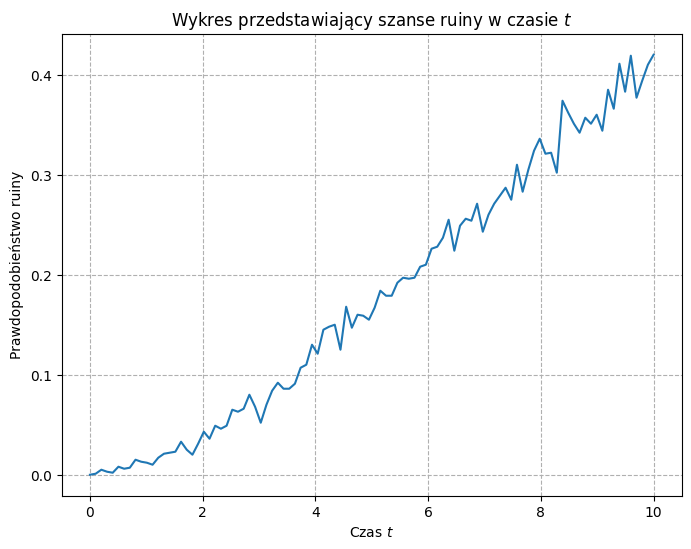

In [29]:
def risk_process(T: float, intensity: float, lam: float, c_0: float, u: float) -> tuple:
    """
    Symuluje proces ryzyka zgodnie z modelem Craméra-Lundberga

    Args:
        T (float): Czas symulacji.
        intensity (float): Intensywność procesu ryzyka.
        lam (float): Intensywność procesu bankructwa.
        c_0 (float): Stała współczynniku wzrostu ryzyka.
        u (float): Początkowa wartość procesu ryzyka.

    Returns:
        tuple: Krotka zawierająca dwa ndarray - czasy i wartości procesu ryzyka.

        Example:
    >>> times, values = risk_process(10, 1, 1, 0.5, 5)
    >>> times[:5]
    array([0.        , 0.74130617, 0.93583967, 1.2647065 , 1.37729547])
    >>> values[:5]
    array([5.        , 5.29890274, 5.54843816, 5.88715482, 6.11395122])
    """
    vals = np.array([])
    times = np.array([])

    t_sum = 0
    vals_sum = u
    times = np.append(times, t_sum)
    vals = np.append(vals, vals_sum)
    while t_sum <= T:
        t = np.random.exponential(1/intensity)
        t_sum += t
        vals_sum += c_0 * t
        times = np.append(times, t_sum)
        vals = np.append(vals, vals_sum)

        vals_sum -= np.random.exponential(1/lam)
        times = np.append(times, t_sum)
        vals = np.append(vals, vals_sum)
    return times, vals

def probabilities_counter(MC: int, lam: float, intensity: float, c_0: float, u: float, T: float, n: int) -> tuple:
    """
    Liczy prawdopodobieństwo ruiny w różnych momentach czasowych.

    Args:
    MC (int): Liczba symulacji Monte Carlo.
    lam (float): Intensywność procesu bankructwa.
    intensity (float): Intensywność procesu ryzyka.
    c_0 (float): Stała współczynniku wzrostu ryzyka.
    u (float): Początkowa wartość procesu ryzyka.
    T (float): Czas końcowy symulacji.
    n (int): Liczba punktów czasowych do sprawdzenia prawdopodobieństwa ruiny.

    Returns:
    tuple: Krotka zawierająca czasy i odpowiadające im prawdopodobieństwa ruiny.

    Example:
    >>> times, probabilities = probabilities_counter(1000, 1, 1, 0.5, 5, 10, 100)
    >>> len(times)
    100
    >>> len(probabilities)
    100
    """
    times_checker = np.linspace(0, T, n)
    probabilities = np.empty(len(times_checker))

    for n, current_time in enumerate(times_checker):
        bankrupcies = np.empty(MC)
        for i in range(MC):
            times, results = risk_process(T, intensity, lam, c_0, u)
            index = np.argmax(times > current_time)
            bankrupcies[i] = 0 if results[index] > 0 else 1
        probabilities[n] = np.mean(bankrupcies)
    return times_checker, probabilities

#Parametry
MC = 10**3
lam = 1
intensity = 1
c_0 = 0.5
u = 5
T = 10
n = 10**2

# Obliczenie prawdopodobieństw ruiny w różnych momentach czasowych
times, probabilities = probabilities_counter(MC, lam, intensity, c_0, u, T, n)

# Wykres wyników
plt.figure(figsize=(8, 6))
plt.plot(times, probabilities)
plt.xlabel(r'Czas $t$')
plt.ylabel('Prawdopodobieństwo ruiny')
plt.title(r'Wykres przedstawiający szanse ruiny w czasie $t$')
plt.grid(True, which="major", ls="--")
plt.show()

### Symulacja Czasu Ruiny

Celem niniejszej analizy jest zweryfikowanie wyników teoretycznych poprzez symulacje komputerowe. Wykorzystamy w tym celu pomocnicze prawdopodobieństwo ruiny w skończonym czasie $T$, oznaczane jako $\Psi(u, c, T)$, tj.:

$$\Psi(u, c, T) = \mathbb{P}(\tau < T).$$

Dla ustalonych wartości $c_0$ i $u_0$, należy sporządzić wykresy funkcji $u \mapsto \psi(u, c_0)$ oraz $c \mapsto \psi(u_0, c)$. Porównamy wyniki symulacji z wartościami teoretycznymi.

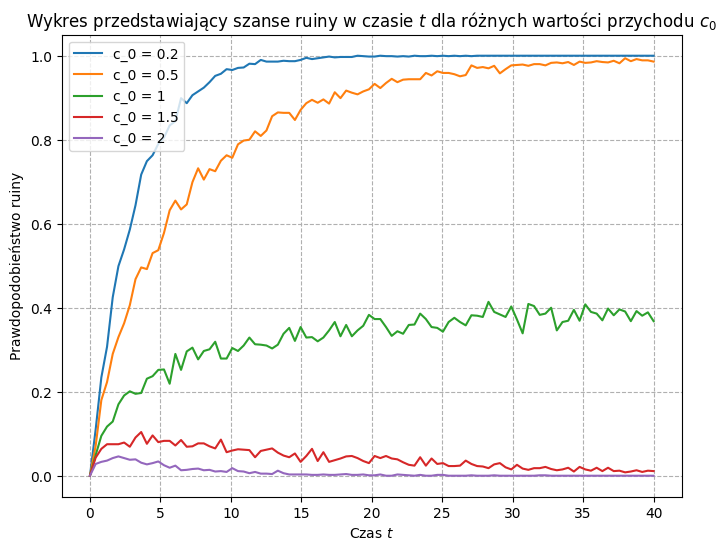

In [35]:
#Parametry
T=40
n=100

# Wartości przychodu do symulacji
c_values = [0.2, 0.5, 1, 1.5, 2]

plt.figure(figsize=(8, 6))

# Iteracja przez różne wartości c_0
for c_0 in c_values:
    times, probabilities = probabilities_counter(MC, lam, intensity, c_0, u, T, n)
    plt.plot(times, probabilities, label=f'c_0 = {c_0}')

# Wykres wyników
plt.xlabel(r'Czas $t$')
plt.ylabel('Prawdopodobieństwo ruiny')
plt.title(r'Wykres przedstawiający szanse ruiny w czasie $t$ dla różnych wartości przychodu $c_0$')
plt.grid(True, which="major", ls="--")
plt.legend()
plt.show()

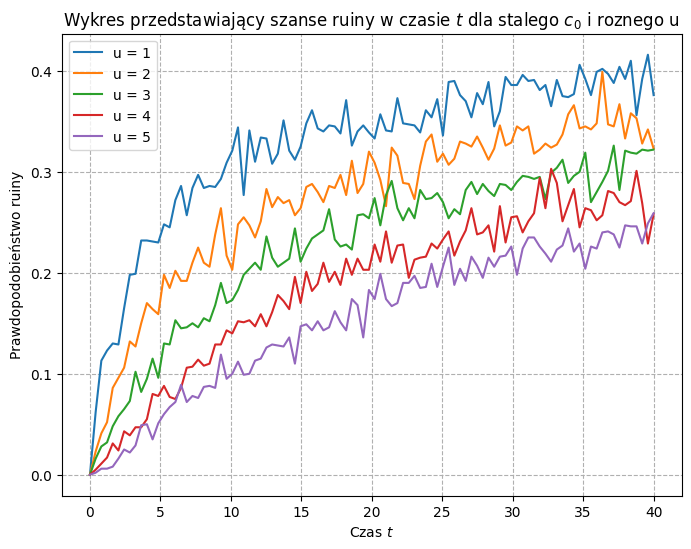

In [37]:
#Parametry
T=40
n=100
c_0=1

# Wartości przychodu do symulacji
u_values = [1, 2, 3, 4, 5]

plt.figure(figsize=(8, 6))

# Iteracja przez różne wartości c_0
for u in u_values:
    times, probabilities = probabilities_counter(MC, lam, intensity, c_0, u, T, n)
    plt.plot(times, probabilities, label=f'u = {u}')

# Tworzenie wykresu
plt.xlabel(r'Czas $t$')
plt.ylabel('Prawdopodobieństwo ruiny')
plt.title(r'Wykres przedstawiający szanse ruiny w czasie $t$ dla stalego $c_0$ i roznego u')
plt.legend()
plt.grid(True, which="major", ls="--")
plt.show()


### Odwrotna Funkcja Ruiny

Innym aspektem analizy jest zbadanie funkcji odwrotnej, tj. wyznaczenie wartości $c$ przy zadanym prawdopodobieństwie ruiny $\psi$. Wzór na odwrotną funkcję ruiny można wyrazić jako:

$$c(u, \psi) = \frac{\lambda u}{W_0 \left( \frac{u \psi \eta}{e} \right)},$$

gdzie $W_0$ to gałąź funkcji W Lamberta definiowana równaniem $W_0(xe^x) = x$ dla $x \geq 0$. 


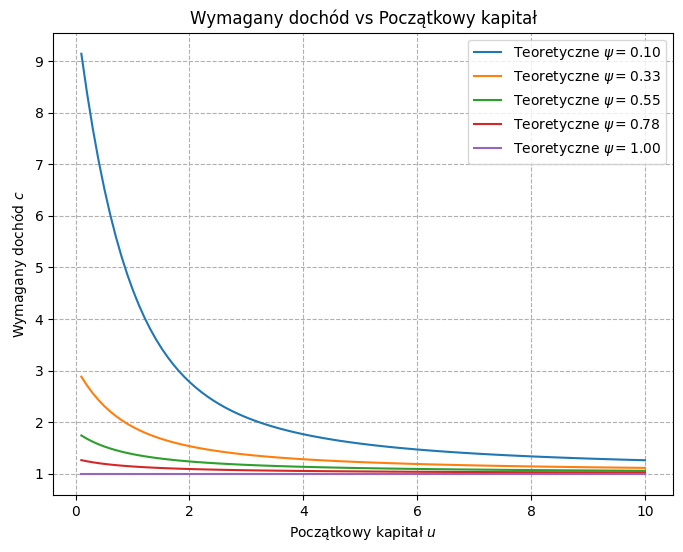

In [38]:
# Funkcja teoretyczna c
def c_theoretical(u: float, psi: float, lam: float, eta: float) -> float:
    """
    Oblicza teoretyczny wymagany dochód 'c' na podstawie początkowego kapitału 'u'
    oraz określonych parametrów.

    Args:
        u (float): Początkowy kapitał.
        psi (float): Parametr wpływający na model.
        lam (float): Parametr intensywności.
        eta (float): Parametr wpływający na model.

    Returns:
        float: Teoretyczny wymagany dochód 'c'.

    Raises:
        ValueError: Jeśli u lub psi są nieprawidłowe (u <= 0 lub psi <= 0).

    Notes:
        Funkcja oblicza 'c' na podstawie wzoru teoretycznego:
        c = (lam * u) / W((u * psi * exp(u / eta)) / eta), gdzie W oznacza funkcję Lamberta.
        Obsługuje nieprawidłowe wartości psi, u oraz błędy wynikające z obliczeń funkcji Lamberta.

    Example:
    >>> c_teoretyczne(5, 0.5, 1, 1)
    4.675489520327615
    >>> c_teoretyczne(10, 0.8, 2, 0.5)
    9.04212116713116
    """
    if psi <= 0 or u <= 0:
        return np.nan  # Obsługa nieprawidłowych wartości psi lub u
    z = (u * psi * np.exp(u / eta)) / eta
    if z < 0:
        print(f"Niewłaściwa wartość z: u={u}, psi={psi}, z={z}")
        return np.nan  # Obsługa nieprawidłowych wartości z
    w = np.real(lambertw(z))
    if w == 0:
        print(f"Niewłaściwy wynik funkcji Lambert W: z={z}, w={w}")
        return np.nan  # Obsługa nieprawidłowego wyniku funkcji Lamberta
    return (lam * u) / w

# Parametry
lam = 1
eta = 1
psi_values = np.linspace(0.1, 1, 5)
u_values = np.linspace(0, 10, 100)

# Teoretyczne wartości c dla zakresu u i psi
theoretical_c = np.array([[c_theoretical(u, psi, lam, eta) for u in u_values] for psi in psi_values])

# Tworzenie wykresu teoretycznych wartości c dla różnych wartości psi
plt.figure(figsize=(8, 6))

for i, psi in enumerate(psi_values):
    plt.plot(u_values, theoretical_c[i, :], label=f'Teoretyczne $\psi={psi:.2f}$')

plt.xlabel('Początkowy kapitał $u$')
plt.ylabel('Wymagany dochód $c$')
plt.title('Wymagany dochód vs Początkowy kapitał')
plt.legend()
plt.grid(True, which="major", ls="--")
plt.show()


***Wnioski***
1. Model Craméra-Lundberga: Model ten jest skutecznym narzędziem do analizy ryzyka ruiny ubezpieczyciela, pozwalając na matematyczne modelowanie kapitału w czasie oraz oceny prawdopodobieństwa ruiny.

2. Prawdopodobieństwo ruiny: Wzór Pollaczeka-Chinczyna dostarcza dokładnego sposobu na obliczenie prawdopodobieństwa ruiny, co jest kluczowe dla oceny stabilności finansowej ubezpieczyciela.

3. Warunek stabilności: Aby uniknąć pewnej ruiny, średnia stopa przychodów z premii musi przewyższać średnią stopę wypłat z tytułu szkód ($c>\lambda \eta$)

4. Symulacje Monte Carlo: Symulacje Monte Carlo mogą być użyte do oszacowania wartości prawdopodobieństwa ruiny poprzez generowanie wielu realizacji procesów ryzyka i analizę wyników.

5. Wymagany dochód: Analiza wymaganego dochodu $c$ w zależności od początkowego kapitału $u$ i innych parametrów modelu jest kluczowa dla planowania finansowego ubezpieczyciela.

Podsumowując, zadanie to dostarcza głębokiego zrozumienia teoretycznych i praktycznych aspektów ryzyka ruiny w kontekście modelu Craméra-Lundberga, co jest istotne dla zarządzania ryzykiem w sektorze ubezpieczeniowym